In [9]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.utils import shuffle

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data_dir = '/content/drive/MyDrive/training-validation'

!ls "$data_dir"
!find "$data_dir" -name '*.csv' -type f| wc -l


csv_files =  glob.glob(data_dir + "/**/*.csv")
combined_csv = []
train_y = []
for f in csv_files:
    df = pd.read_csv(f, header=None)
    
    df = df[df != '#']
    df = df[df != '--1']
    if len(df)!=31 or pd.isnull(df.iloc[0, 4]):
        continue
    combined_csv.append(df.iloc[:, 0:3])
    train_y.append(df.iloc[0, 4])

train_x = pd.concat([df for df in combined_csv], ignore_index=True).astype(np.float32)
train_y = np.array(train_y)

__MACOSX  sub01  sub02	sub03  sub05
1204


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

In [13]:
train_x.shape

(17484, 3)

In [14]:
from keras.utils import to_categorical

train_x = train_x.reshape(-1, 31, 3)

# Convert output to one-hot encoding
train_y = to_categorical(train_y, num_classes=3)

In [15]:
train_x = train_x[:int(len(train_x)/100*80)]
train_y = train_y[:int(len(train_y)/100*80)]

test_x = train_x[int(len(train_x)/100*80):]
test_y = train_y[int(len(train_y)/100*80):]

In [16]:
train_x.shape
# print(train_x[0])

(451, 31, 3)

In [17]:
train_y.shape

(451, 3)

In [18]:
test_x.shape

(91, 31, 3)

In [19]:
test_y.shape

(91, 3)

#### Define the model 1

In [20]:
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(64, activation='relu', input_shape=(31, 3)),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
# Train the model
history1 = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y), batch_size=256)

Epoch 1/30
2/2 [==============================] - 3s 617ms/step - loss: 1.1424 - accuracy: 0.3769 - val_loss: 1.0685 - val_accuracy: 0.5604
Epoch 2/30
2/2 [==============================] - 0s 59ms/step - loss: 1.1121 - accuracy: 0.3880 - val_loss: 1.0427 - val_accuracy: 0.5495
Epoch 3/30
2/2 [==============================] - 0s 52ms/step - loss: 1.0889 - accuracy: 0.4124 - val_loss: 1.0207 - val_accuracy: 0.5495
Epoch 4/30
2/2 [==============================] - 0s 56ms/step - loss: 1.0491 - accuracy: 0.4302 - val_loss: 1.0002 - val_accuracy: 0.5495
Epoch 5/30
2/2 [==============================] - 0s 55ms/step - loss: 1.0288 - accuracy: 0.4124 - val_loss: 0.9819 - val_accuracy: 0.5495
Epoch 6/30
2/2 [==============================] - 0s 55ms/step - loss: 1.0143 - accuracy: 0.4302 - val_loss: 0.9661 - val_accuracy: 0.5714
Epoch 7/30
2/2 [==============================] - 0s 61ms/step - loss: 0.9779 - accuracy: 0.4590 - val_loss: 0.9515 - val_accuracy: 0.5604
Epoch 8/30
2/2 [==========

In [22]:
# Evaluate the model on the test dataset
test_loss1, test_acc1 = model.evaluate(test_x, test_y)
print('Test loss:', test_loss1)

3/3 [==============================] - 0s 10ms/step - loss: 0.8882 - accuracy: 0.3956
Test loss: 0.8882225155830383


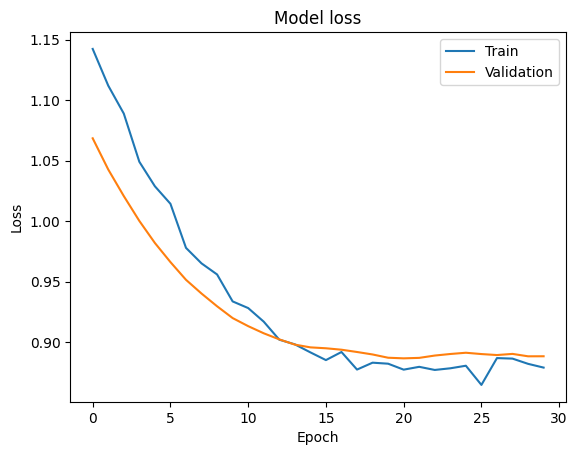

In [23]:
# Plot the validation and test loss for each epoch
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Define the model 2

In [24]:
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(128, activation='relu', input_shape=(31, 3)),
    tf.keras.layers.GRU(18, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Train the model
history2 = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y), batch_size=256)

Epoch 1/30
2/2 [==============================] - 4s 519ms/step - loss: 1.0896 - accuracy: 0.4058 - val_loss: 1.0524 - val_accuracy: 0.3956
Epoch 2/30
2/2 [==============================] - 0s 66ms/step - loss: 1.0304 - accuracy: 0.5122 - val_loss: 1.0040 - val_accuracy: 0.3956
Epoch 3/30
2/2 [==============================] - 0s 69ms/step - loss: 0.9866 - accuracy: 0.4922 - val_loss: 0.9617 - val_accuracy: 0.3956
Epoch 4/30
2/2 [==============================] - 0s 66ms/step - loss: 0.9390 - accuracy: 0.5233 - val_loss: 0.9273 - val_accuracy: 0.3956
Epoch 5/30
2/2 [==============================] - 0s 71ms/step - loss: 0.9091 - accuracy: 0.5144 - val_loss: 0.9042 - val_accuracy: 0.3956
Epoch 6/30
2/2 [==============================] - 0s 84ms/step - loss: 0.8943 - accuracy: 0.4878 - val_loss: 0.8960 - val_accuracy: 0.3956
Epoch 7/30
2/2 [==============================] - 0s 65ms/step - loss: 0.8833 - accuracy: 0.5122 - val_loss: 0.8983 - val_accuracy: 0.3956
Epoch 8/30
2/2 [==========

In [26]:
# Evaluate the model on the test dataset
test_loss2, test_acc2 = model.evaluate(test_x, test_y)
print('Test loss:', test_loss2)

3/3 [==============================] - 0s 8ms/step - loss: 0.8704 - accuracy: 0.4505
Test loss: 0.8704054355621338


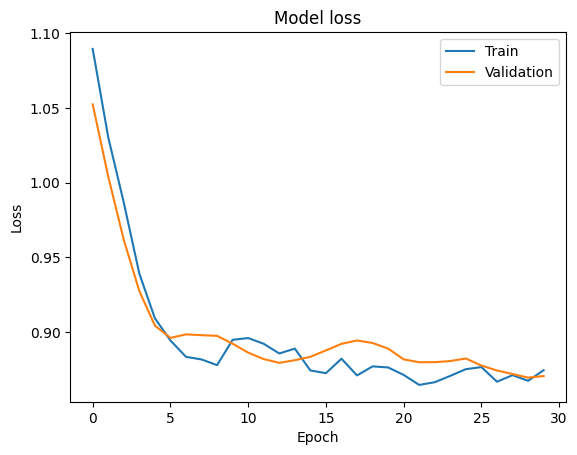

In [27]:
# Plot the validation and test loss for each epoch
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Define the model 3

In [28]:
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(256, activation='relu', input_shape=(31, 3)),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
# Train the model
history3 = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y), batch_size=256)

Epoch 1/30
2/2 [==============================] - 6s 2s/step - loss: 1.0855 - accuracy: 0.3326 - val_loss: 1.0012 - val_accuracy: 0.5714
Epoch 2/30
2/2 [==============================] - 1s 415ms/step - loss: 0.9913 - accuracy: 0.4124 - val_loss: 0.9021 - val_accuracy: 0.5495
Epoch 3/30
2/2 [==============================] - 1s 491ms/step - loss: 0.9012 - accuracy: 0.4568 - val_loss: 0.8925 - val_accuracy: 0.3956
Epoch 4/30
2/2 [==============================] - 1s 251ms/step - loss: 0.8918 - accuracy: 0.5055 - val_loss: 0.9397 - val_accuracy: 0.3956
Epoch 5/30
2/2 [==============================] - 1s 272ms/step - loss: 0.9236 - accuracy: 0.5255 - val_loss: 0.9077 - val_accuracy: 0.3956
Epoch 6/30
2/2 [==============================] - 0s 229ms/step - loss: 0.9061 - accuracy: 0.4989 - val_loss: 0.8748 - val_accuracy: 0.3956
Epoch 7/30
2/2 [==============================] - 1s 276ms/step - loss: 0.8885 - accuracy: 0.4745 - val_loss: 0.8873 - val_accuracy: 0.3956
Epoch 8/30
2/2 [=======

In [30]:
# Evaluate the model on the test dataset
test_loss3, test_acc3 = model.evaluate(test_x, test_y)
print('Test loss:', test_loss3)

3/3 [==============================] - 0s 22ms/step - loss: 0.8751 - accuracy: 0.3956
Test loss: 0.8750542402267456


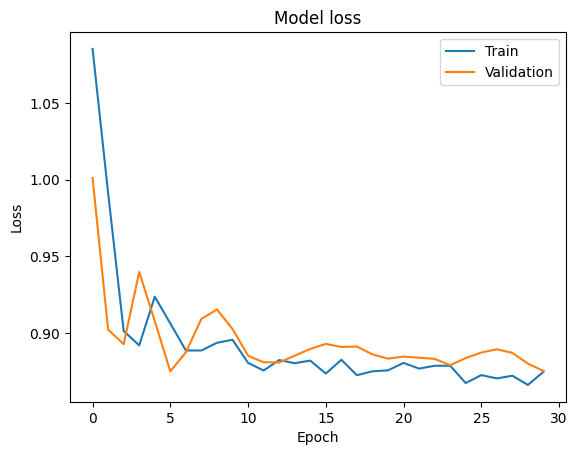

In [31]:
# Plot the validation and test loss for each epoch
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Define the model 4

In [32]:
model = tf.keras.Sequential([  
    tf.keras.layers.Dense(128, activation='relu', input_shape=(31, 3)),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax'),
])

adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
# Train the model
history4 = model.fit(train_x, train_y, epochs=150, validation_data=(test_x, test_y), batch_size=256)

Epoch 1/150
2/2 [==============================] - 5s 1s/step - loss: 1.0808 - accuracy: 0.4545 - val_loss: 1.0656 - val_accuracy: 0.5714
Epoch 2/150
2/2 [==============================] - 0s 228ms/step - loss: 1.0710 - accuracy: 0.4501 - val_loss: 1.0542 - val_accuracy: 0.5714
Epoch 3/150
2/2 [==============================] - 0s 208ms/step - loss: 1.0592 - accuracy: 0.4435 - val_loss: 1.0429 - val_accuracy: 0.5714
Epoch 4/150
2/2 [==============================] - 0s 210ms/step - loss: 1.0501 - accuracy: 0.4346 - val_loss: 1.0320 - val_accuracy: 0.5714
Epoch 5/150
2/2 [==============================] - 0s 256ms/step - loss: 1.0381 - accuracy: 0.4257 - val_loss: 1.0220 - val_accuracy: 0.5714
Epoch 6/150
2/2 [==============================] - 0s 271ms/step - loss: 1.0286 - accuracy: 0.4390 - val_loss: 1.0119 - val_accuracy: 0.5714
Epoch 7/150
2/2 [==============================] - 0s 248ms/step - loss: 1.0190 - accuracy: 0.4390 - val_loss: 1.0017 - val_accuracy: 0.5714
Epoch 8/150
2/2 

In [34]:
# Evaluate the model on the test dataset
test_loss4, test_acc4 = model.evaluate(test_x, test_y)
print('Test loss:', test_loss4)

3/3 [==============================] - 0s 14ms/step - loss: 0.8832 - accuracy: 0.3956
Test loss: 0.8831745982170105


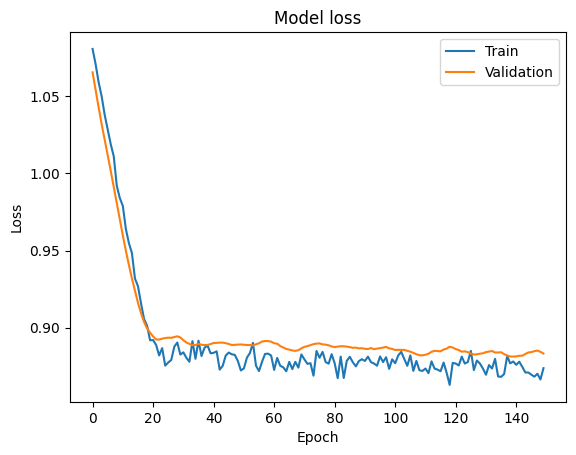

In [35]:
# Plot the validation and test loss for each epoch
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [36]:
print("Best gru model is:", np.argmax([test_acc1, test_acc2, test_acc3, test_acc4]))

Best gru model is: 1


In [37]:
model.save('nikil_gru.h5')

 **TEST SCRIPT**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd 
import glob
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/test-1/test'

!ls "$data_dir"
!find "$data_dir" -name '*.csv' -type f| wc -l

csv_files =  glob.glob(data_dir + "/**/*.csv")
combined_csv = []
train_y = []
for f in csv_files:
    df = pd.read_csv(f, header=None)
    
    df = df[df != '#']
    df = df[df != '--1']
    if len(df)!=31 or pd.isnull(df.iloc[0, 4]):
        continue
    combined_csv.append(df.iloc[:, 0:3])
    train_y.append(df.iloc[0, 4])

train_x = pd.concat([df for df in combined_csv], ignore_index=True).astype(np.float32)
train_y = np.array(train_y)

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)

from keras.utils import to_categorical

train_x = train_x.reshape(-1, 31, 3)

# Convert output to one-hot encoding
train_y = to_categorical(train_y, num_classes=3)

train_x = train_x[:int(len(train_x)/100*80)]
train_y = train_y[:int(len(train_y)/100*80)]
test_x = train_x[int(len(train_x)/100*80):]
test_y = train_y[int(len(train_y)/100*80):]


model = tf.keras.models.load_model('nikil_gru.h5')

test_loss = model.evaluate(test_x, test_y)
print(test_loss)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
sub01  sub02  sub03  sub05
106
1/1 [==============================] - 1s 767ms/step - loss: 0.7538 - accuracy: 0.3529
[0.7538009881973267, 0.3529411852359772]
